# Utilización de Jupyter Note Books para manejo del PSS/E

---

## Introducción a los Note Books

En este **NoteBook** de introducción se explica y ejemplifica la utilización de Note Books con PSS/E, con la finalidad de mostrar y discutir las ventajas y desventajas que tiene utilizar esta funcionalidad interactiva de _Python_.

 El primer comentario que se hace es que una de las mayores ventajas de esta herramienta es que nos permite ejecutar porciones de código (_chunks_) dentro de un ambiente controlado y preparado para utilizar _Python_ en cualquier momento. Para quienes hayan tenido oportunidad de trabajar con _R Markdown_ observarán que es algo muy parecido.
 
 **Nota:** En los videos que se muestran en la _wiki_ del repositorio de esta [liga](https://github.com/urieluard/PSSE/wiki) podrán encontrar tutoriales (videos) que muestran la utilización de los comandos más importantes y que se requieren para ejecutar este Note Book, por lo tanto, si no los han visto recomiendo los revisen antes de continuar. 
 
 ## Librerías requeridas (PSSPY y PSS/E)

 En el _Readme_ del [repositorio](https://github.com/urieluard/PSSE/blob/main/README.md) creado para este proyecto se menciona que las librerías para comunicar o ejecutar funciones de **PSS/E** mediante _Python_ se llama **PSSPY**, que existen diferentes versiones de esta librería y que depende del ambiente en el que se esté trabajando, tanto de _Python_ como de **PSS/E** es la versión que debemos tener instalada e instanciada.

 Para la utilización de los Note Books es necesario "instanciar" o indicar a la interfase (Visual Studio Code en este caso) cuál _Kernel_ utilizar (la palabra [_Kernel_](https://es.wikipedia.org/wiki/N%C3%BAcleo_(inform%C3%A1tica)) en informática se refiere a núcleo o parte fundamental del sistema operativo que se pretende ejecutar para alguna tarea en específico). En nuestro caso, el _Kernel_ que se utiliza es _Python_ en su versión `2.7`, en la cual ya se instalaron la librería PSSPY27 (que es la que le corresponde a esta versión de _Python_); así como la librería IPython en la versión correcta para _Python_ `2.7`.

 Para saber qué librerías y qué versiones tenemos instalados en nuestro ambiente, podemos ubicarnos en una terminal, dirigirnos a la ruta donde se tiene instalada la versión de _Python_ de interés (en este caso la `2.7`) y ejecutar el comando:
 
  `pip freeze`

Tal como se muestra en las siguientes líneas:

 ```
C:\Python27>pip freeze
 functionality.
backports-abc==0.5
backports.functools-lru-cache==1.6.4
backports.shutil-get-terminal-size==1.0.0
colorama==0.4.4
decorator==4.4.2
enum34==1.1.10
futures==3.3.0
ipykernel==4.10.1        <------------------
ipython==5.10.0          <------------------
ipython-genutils==0.2.0  <------------------  LIBRERÍAS REQUERIDAS PARA EJECUTAR JUPYTER NOTE BOOKS
jupyter-client==5.3.5    <------------------
jupyter-core==4.6.3      <------------------
numpy==1.16.6
pandas==0.24.2
pathlib2==2.3.7.post1
pickleshare==0.7.5
prompt-toolkit==1.0.18
Pygments==2.5.2
python-dateutil==2.8.2
pytz==2022.1
pywin32==221
pyzmq==19.0.2
scandir==1.10.0
simplegeneric==0.8.1
singledispatch==3.7.0
six==1.16.0
tornado==5.1.1
traitlets==4.3.3
typing==3.10.0.0
wcwidth==0.2.5
win-unicode-console==0.5

 ```

### Importando las librerías requeridas

En la siguiente celda se realiza el primer ejercicio de ejecución de código, en el cual se importan a nuestro ambiente de ejecución las librerías: _os, sys, pss34, psspy y redirec_. Además se definen las rutas de las carpetas queindican en donde se encuentran: la carpeta con la librería **PSSPY** y el ejecutable de **PSS/E 34**.

El resultado de esta ejecución se muestra al final de la celda de código, donde se ve el mensaje de que el programa (**PSS/E**) está ejecutándose dentro de este ambiente.

In [1]:
import os
import sys
import psse34
import psspy
import redirect

#Damos de alta los directorios de psse,para correrlo sin abrirlo

PSSPY_location = r'C:\Program Files (x86)\PTI\PSSE34\PSSPY27' #hay que cambiar la ruta dependianto si se usa psse34 o 35 tambien en base al python 2 o 3
PSSE_location = r'C:\Program Files (x86)\PTI\PSSE34\PSSBIN' #hay que cambiar la ruta dependianto si se usa psse34 o 35
sys.path.append(PSSPY_location)
sys.path.append(PSSE_location)
os.environ['PATH'] += ';' + PSSPY_location
os.environ['PATH'] += ';' + PSSE_location

redirect.psse2py()
psspy.psseinit(50000)


 Input error detected at !
 -m ipykernel_launcher --ip=127.0.0.1 --stdin=9003 --control=9001 --hb=9000 "--Session.signature_scheme=\"hmac-sha256\"" "--Session.key=b\"390aeb48-415c-4793-b66d-8b511cb6d617\"" --shell=9002 "--transport=\"tcp\"" --iopu
                                                                                                          !

 PSS(R)E Version 34
 Copyright (c) 1976-2022
 Siemens Industry, Inc.,
 Power Technologies International                            (PTI)
 This program is a confidential  unpublished  work  created  and  first
 licensed in 1976.  It is a trade secret which is the property of  PTI.
 All use,  disclosure,  and/or reproduction not specifically authorized
 by  PTI  is prohibited.   This  program is protected  under  copyright
 laws  of  non-U.S.  countries  and  by  application  of  international
 treaties.  All  Rights  Reserved  Under  The  Copyright  Laws.


           SIEMENS POWER TECHNOLOGIES INTERNATIONAL

      50000 BUS POWER SYST

0

Hay otra forma de importar las funciones de las librerías **PSSPY**, mediante un archivo compilado (*lib_psse.pyc*) el cual fue creado por **Omar Miguel Sánchez**, el archivo contiene todas las funciones con las que opera el **PSS/E** y "configura" nuestro ambiente de trabajo para empezar a trabajar directamente con **PSS/E**, la única condición que requiere es que el archivo se encuentre en la misma ruta donde se ejecutará el módulo de _Python_ o el Note Book de Jupyter. 

Para mandar llamar esta librería solo hay que ejecutar el siguiente comando:

In [2]:
from lib_psse import *

Y observamos que se ha puesto en ejecución la aplicación de **PSS/E**

## Ejemplos de uso del NoteBook

En las secciones siguientes se harán algunos ejercicios de manipulación y visualización de ejecuciones de **PSS/E** dentro de _Note Books_ con fines de demostración y para que en desarrollos posteriores se puedan reutilizar. Para la realización de los ejemplos se utiliza de referencia de la documentación del **PSS/E**, en la sección 

### 1. Leer un caso (*.sav)

El primer ejemplo consiste en cargar un caso en el ambiente y ver su contenido. Para ello se usa la librería `psspy` con la _API_ `case`. 

**IMPORTANTE** 

Todos los comandos o _APIs_ que se utilizan para comunicarse con **PSS/E** (algunos para lectura y otros para modificar directamente el caso) se encuentran en la documentación de **PSS/E**, en la sección de _Aplication Program Interface (API)_

In [3]:
# Comandos de Python

CASOS_PATH = "./casos/" # Ruta donde se guardan los archivos .sav (de acuerdo con la estructura del repositorio)
casos_sav = os.listdir(CASOS_PATH) # Genera una lista con los nombres de 

# Sección 1.55 de la Docuementación

psspy.case(os.path.abspath("casos/" + casos_sav[0])) # Obtiene el caso en la ubicación: [PATH de este NoteBook]/casos/[primer archivo que encuentre en la carpeta]





 The Saved Case in file d:\10243.CENACE\Desktop\PSSE\casos\1-C15_2027_V16H_OCC_NTE_NES.sav was saved on TUE, APR 12 2022  11:48


0

Este comando transfiere el caso indicado al espacio de trabajo de **PSS/E**, con lo cual ya se puede extraer información de él.

### 2. Extraer información de un caso

En este ejemplo se extrae información referente al resumen del caso (_summary_). La salida de esta API es una tabla impresa (un _print_), no se puede tener acceso a las variables que permiten su creación. 

In [4]:
# Sección 1.139 de la Docuementación

psspy.list(0,1,1,0)

     PTI INTERACTIVE POWER SYSTEM SIMULATOR--PSS(R)E     WED, MAY 04 2022   8:05
                                                                  SYSTEM SUMMARY


 ---------------------BUSES----------------------        -----GENERATION----- ----SHUNTS----- -IND MACHS- FACTS   GNE
  TOTAL  PQ<>0.  PQ=0.  PE/E   PE/Q  SWING  OTHER  LOADS PLANTS MACHNS   WIND  FIXED SWITCHED GENS MOTORS  DEVS  DEVS
  10605   3679   5520    618    299      2    487   4407   1297   1420    432   1665     97      0      0    11     0
 ------------------AC BRANCHES------------------- 3WIND MULTI-SECTION ---DC LINES--                    AREA X------- SWING BUSES -------X
  TOTAL    RXB     RX    RXT   RX=0.    IN    OUT XFORM  LINES SECTNS 2TRM MTRM VSC AREAS ZONES OWNRS TRANS  20025     MMT-03-HI   17.000
  12692   5593    132   6740    227  12025    667   728      0      0    3    0   0    11    40   188     0  20027     MMT-05-HI   17.000
      ----GENERATION---- INDUCTION                                  

0

### 3. Creación de un subsistema

Esta familia de comandos es de los más utilizados porque generalmente se requiere actuar sobre ciertos elementos y no en todo el sistema. En la Docuemntación el **capítulo 5** está dedicado solo a esta actividad.

In [5]:
# Subsistema identificado con el número "1" que comprende a todas las subestaciones del área "5"

ierr = psspy.asys(1, 1, [5])
ierr

0

Este comando no regresa nada, pero le indica al espacio de trabajo que existe un subsistema conformado por todos los buses y elementos asociados que pertenecen al área 5. Las funciones que se ejecuten posteriormente a esta definición de susbistema y que se identifiquen con el subsistema "1", actuarán únicamente sobre estos buses (los del área 5).

### 4. Extracción de valores para manipulación

Para este ejercicio se "pide" al programa **PSS/E** nos devuelva el total de demanda de un grupo de subestaciones en el caso. Las extracciones de información del caso se encuentran en el **capítulo 8** de la documentación (8.23.3).

In [6]:
# Devuelve la carga total (en MW y MVAr) de los nodos en servicio con cargas en servicio del subsistema "1"

ierr, xarray = psspy.aareacplx(1, 1, ['PQLOAD'])
xarray

[[(5803.85888671875+1338.0889892578125j)]]

De acuerdo con la Documentación (sección 8.23.3), esta API devuelve un arreglo con el número complejo que representa la carga (Real: MW ; Complejo: MVAr) del subsistema de área definido. Esperamos entonces un arreglo de la siguiente forma: 

```
[[(MW + jMVAr totales del subsistema definido)]]

[[(5803.85888671875+1338.0889892578125j)]] 

```

En caso de que queramos saber esta información para algún otro mismo subsistema, podemos utilizar la estructura de arreglos que _Python_ permite utilizar de manera nativa: 

> **Listas, Listas de listas, Diccionarios, Tuplas [(ver más detalles aquí)](https://docs.python.org/es/3/tutorial/datastructures.html)**

O bien, arreglos o estructuras de otras paqueterías, que también son muy utilizados para el análisis de datos:

 > **Arreglos de [numpy](https://numpy.org/)**
 
 > **_Dataframes_ de [pandas](https://pandas.pydata.org/)**

### 5. Creación de nuevas estructuras de datos

En el ejercicio anterior se vió la forma en que se pueden extraer datos del caso de **PSS/E**, sin embargo, esta información (en la forma en la que viene) muchas veces no es útil para los efectos que nosotros queremos, por ejemplo hacer alguna operación, crear un reporte, graficar, entre otros. Para ello podemos manipular o modificar los arreglos que se obtienen con las funciones de la librería **PSSPY** de la forma que más nos convenga para algún otro tratamiento que queramos aplicar a los datos. En este ejercicio, más complejo que los anteriores se pretende realizar lo siguiente:

+ Extraer el total de la demanda de 3 áreas [3, 5, 6] (MW y MVAr)
+ Calcular el factor de potencia de cada una
+ Calcular la potencia aparente (MVA)
+ Generar una tabla con estos cuatros valores

Para resolver este ejercicio podemos hacerlo de diferentes maneras, dependerá de la lógica con que cada persona visualice la solución será la implementación que va a realizar. Algunas implementaciones pueden ser "mejores" que otras en términos de legibilidad del código, eficiencia de ejecución, escalabilidad, etcétera. Sin embargo, cubrir con todas estas características requiere de grados elevados de conocimiento del lenguaje de programación y experiencia en el desarrollo. Por ahora el único requisito que se pide es que cumpla con la tarea encomendada. En este sentido, si a alguien se le ocurre iterar con una variable para generar arreglos o si lo hace de manera puntual, definiendo variables para cada parámetro que se utiliza para obtener el resultado solicitado, está bien.

In [7]:
# Pseudo-Código de una Posible solución

# 1. Crear 3 subsistemas (uno para cada área)
# 2. Extraer la demanda (en MW y MVAr) de cada uno de los subsistemas
# 3. Realizar las operaciones (cálculos de MVA y FP)
# 4. Crear una estructura de datos para vaciar esta información y reportarla

In [8]:
# Librerías adicionales que se requieren para la ejecución del código

import math  # Para el cálculo del FP
import pandas as pd  # Para la creación de la estructura de datos

In [9]:
# Paso 1. Define subsistemas

psspy.asys(0, 1, [3])
psspy.asys(1, 1, [5])
psspy.asys(2, 1, [6])

# Paso 2. Extrae datos de cada subsistema y almacena en variables independientes

ierr, xarray3 = psspy.aareacplx(0, 1, ['PQLOAD'])
ierr, xarray5 = psspy.aareacplx(1, 1, ['PQLOAD'])
ierr, xarray6 = psspy.aareacplx(2, 1, ['PQLOAD'])

# Paso 3. Realiza cálculos solicitados

MVA3 = abs(xarray3[0][0])
MVA5 = abs(xarray5[0][0])
MVA6 = abs(xarray6[0][0])

FP3 = xarray3[0][0].real/MVA3
FP5 = xarray5[0][0].real/MVA5
FP6 = xarray6[0][0].real/MVA6

# Paso 4. Crea una estructura de datos con los valores obtenidos (Data Frame)

results = {
    '1-Area' : [3,5,6],
    '2-MW': [xarray3[0][0].real,xarray5[0][0].real,xarray6[0][0].real],
    '3-MVAr': [xarray3[0][0].imag,xarray5[0][0].imag,xarray6[0][0].imag],
    '4-MVA': [MVA3,MVA5,MVA6],
    '5-FP': [FP3,FP5,FP6],
}
r = pd.DataFrame(results)
r


,1-Area,2-MW,3-MVAr,4-MVA,5-FP
0,3,11784.241211,3866.675049,12402.399641,0.950158
1,5,5803.858887,1338.088989,5956.111157,0.974438
2,6,11408.402344,3745.507080,12007.517117,0.950105


> **NOTA:** El Data Frame que se creó con la librería de _pandas_ se hizo por medio de un diccionario, pero hay más [formas de hacerlo](https://www.codigopiton.com/como-crear-un-dataframe-con-pandas-y-python/#:~:text=Para%20crear%20un%20DataFrame%20a,contenido%20listo%20para%20su%20uso.)

### 6. Módulos para tareas específicas

Los ejemplos vistos anteriormente y en general la programación se puede realizar a partir de bloques o porciones de código que, ordenadas de manera adecuada, producen el resultado que buscamos. Continuando con el ejercicio anterior, se puede pensar en una solución que realice la misma tarea pero utilizando otros recursos como los ciclos y las funciones. En este ejemplo se hará la misma tarea del ejercicio anterior pero utilizando ciclos iterativos.

Para ello, antes de realizar la implementación con ciclos iterativos hay que responder las siguientes preguntas:

> ¿Cuáles tareas se repiten?

> ¿Cuántas repeticiones se hacen en cada tarea?

> ¿Cuáles tareas dependen unas de otras y en qué orden?

Para la primera pregunta, podemos ver que: la definición del subsistema (uno para cada área) se repite 3 veces, la extracción de información también se hace 3 veces, el cálculo de los MVA y del FP de igual forma se realiza 3 veces, mientras que la creación del Data Frame solo es realizado una vez. Además, existe una dependencia (secuencia) en la ejecución: primero se definen los subsistemas, después se extraen los datos, se hacen los cálculos y finalmente se vierten en un Data Frame. Con esto en mente se puede generar el siguiente código:

In [10]:
# Definir las variables que necesitamos para cada iteración

areas = [3,5,6]

# Establecer los arreglos en donde se almacenarán los resultados

MW = []
MVAr = []
MVA = []
FP = []
resultados = pd.DataFrame()

# Crear el ciclo y el orden en que se ejecutarán las tareas

for area in areas:
    psspy.asys(0, 1, [area])
    ierr, xarray = psspy.aareacplx(0, 1, ['PQLOAD'])
    MW.append(xarray[0][0].real)
    MVAr.append(xarray[0][0].imag)
    MVA.append(abs(xarray[0][0]))
    FP.append(xarray[0][0].real/abs(xarray[0][0]))

# Crear un Data Frame con los resultados obtenidos

nom_col = ['Area', 'MW', 'MVAr', 'MVA', 'FP']  
cols = [areas,MW,MVAr,MVA,FP]
it = 0

for nom in nom_col:
    resultados[nom] = cols[it]
    it += 1

resultados


,Area,MW,MVAr,MVA,FP
0,3,11784.241211,3866.675049,12402.399641,0.950158
1,5,5803.858887,1338.088989,5956.111157,0.974438
2,6,11408.402344,3745.507080,12007.517117,0.950105


### 7. Utilizar funciones

Podemos ver que la solución del ejemplo 5, a pesar contar con exactamente las mismas líneas de código (19) del ejemplo 6, es una solución que escalarla no llevaría a más líneas de código, muchas más variables y a una mayor concentración para no equivocarnos (errores de dedo) por trabajar con tantas variables. La parte final de lo ejemplos consiste en encapsular los conjuntos de código que consideremos importantes y útiles para su utilización en tareas cotidianas. En este caso haremos dos funciones a partir del código del ejemplo 6 y se discutirá la importancia de hacerlo de esta manera.

Para ello, el primer paso es visualizar las posibles aplicaciones que queramos hacer a partir de la función que queremos crear, por ejemplo:

> El código para realizar una tarea en particular es muy extenso 

> Hay una acción se repite constantemente durante la ejecución del NoteBook o el programa

> La tarea que se realiza es muy útil y práctica que se quiere docuemntar para usar en otros programas

En nuestro caso, detectamos dos tareas que pueden ser utilizadas con frecuencia y el código que ya tenemos para hacerlas es un poco largo. Además, como la aplicación de los NoteBooks puede ser para reportar y/o realizar análisis de flujos de potencia, no es práctico tener los desarrollos programáticos que se hicieron (no es el objetivo). En este sentido, se identifican dos tareas que pueden formar parte de funciones: 

+ _Extracción de la carga del caso de flujos de potencia_ y 

+ _Creación de Data Frames para visualizar resultados y/o graficar_ 

#### Función 1. Extrae datos de carga de las áreas requeridas

In [11]:
def carga_area_(areas):
    '''
        Obtiene la carga de una o varias áreas del sistema.
        Args:
            areas (list): Listado de las áreas que se quieren consultar,
        Returns:
            MW (list): Lista con los valores de la potencia activa en cada área. 
            MVAr (list): Lista con los valores de la potencia reactiva en cada área.
            MVA (list): Lista con los valores de la potencia aparente en cada área.
            FP (list): Lista con los valores del factor de potencia en cada área.
    '''
    # Establecer los arreglos en donde se almacenarán los resultados
    MW = []
    MVAr = []
    MVA = []
    FP = []
    # Crear el ciclo y el orden en que se ejecutarán las tareas
    for area in areas:
        psspy.asys(0, 1, [area])
        ierr, xarray = psspy.aareacplx(0, 1, ['PQLOAD'])
        MW.append(xarray[0][0].real)
        MVAr.append(xarray[0][0].imag)
        MVA.append(abs(xarray[0][0]))
        FP.append(xarray[0][0].real/abs(xarray[0][0]))
    return areas, MW , MVAr, MVA, FP

#### Función 2. Crea un Data Frame de Pandas a partir de valores asignados en arreglo de listas

In [12]:
def crea_df_(nom_cols,val_cols):
    '''
        Crea un DataFrame con los nombres de columna y los valores de cada columna.
        Args:
            nom_cols (list): Listado de las nombres de columna que se desean en el Data Frame (encabezados)
            val_cols (tuple): Tupla con los valores de las variables referentes a cada columna de nom_cols (cada elemento de la lista es también una lista)
        Returns:
            df (DataFrame): Data Frame con los elementos proporcionados 
    '''
    it = 0
    df = pd.DataFrame()
    for nom in nom_cols:
        df[nom] = val_cols[it]
        it += 1
    return df

Mandar llamar a las funciones de acuerdo con la documentación generada para cada una ([docstring](https://peps.python.org/pep-0257/))

In [13]:
# Variables que almacenarán la salida de la función
areas, MW , MVAr, MVA, FP = carga_area_([3,5,6])

# Resultados tras ejecutar lafunción creada
print([areas, MW , MVAr, MVA, FP])

[[3, 5, 6], [11784.2412109375, 5803.85888671875, 11408.40234375], [3866.675048828125, 1338.0889892578125, 3745.507080078125], [12402.39964082708, 5956.111157468201, 12007.517117364267], [0.950158159082805, 0.9744376377934878, 0.9501050243977686]]


In [14]:
# Encabezados de las columnas
nom_cols = ['Area', 'MW', 'MVAr', 'MVA', 'FP']

# Valores de cada columna (el orden de la salida de la función carga_area() coincide con los encabezados definidos, por eso se manda llamar directamente para crear la variable "val_cols")
val_cols = carga_area_([3,5,6])

# Se manda llamar la función y su resultado se almacena en "df"
df = crea_df_(nom_cols,val_cols)
df

,Area,MW,MVAr,MVA,FP
0,3,11784.241211,3866.675049,12402.399641,0.950158
1,5,5803.858887,1338.088989,5956.111157,0.974438
2,6,11408.402344,3745.507080,12007.517117,0.950105


### 8. Llamado a funciones desde un archivo externo

Hemos visto que la idea de tener funciones propias para ejecutar porciones de código específicas para una tarea en particular, simplifica la lectura del código y nos ayuda a tener documentos mas limpios, en esta caso Note Books. Sin embargo, en el ejercicio 7 vemos que las funciones que recién creamos siguen estando en el documento, el cual ya se ha extendido porbastantes líneas. La mejor forma de evitar llenar de funciones nuestro Note Book es creando un archivo _*.py_ con todas las funciones que vayamos creando e importar a nuestro espacio de trabajo las que vayamos a requerir.

En este repositorio ya se creó la estructura necesaria para que al momento de clonarlo se puedan realizar ejercicios escribiendo nuevas funciones en el archivo _funcs.py_ y mandándolas llamar de la siguiente forma: 

In [15]:
from src.funcs import carga_area, crea_df

Con esta instrucción ya podemos mandar llamar las funciones, aunque no estén dentro del Note Book que se está ejecutando.

**Nótese** que las funciones creadas anteriormente tienen un guión bajo al final del nombre **( _ )** mientras que las funciones que se encuentran en el archivo _.py_ no lo tienen. Esto se hizo para garantizar que se están importando correctamente desde el archivo **_func.py_**  

In [16]:
# Encabezados de las columnas
nom_cols = ['Area', 'MW', 'MVAr', 'MVA', 'FP']

# Valores de cada columna (el orden de la salida de la función carga_area() coincide con los encabezados definidos, por eso se manda llamar directamente para crear la variable "val_cols")
val_cols = carga_area([3,5,6])

# Se manda llamar la función y su resultado se almacena en "df"
df = crea_df(nom_cols,val_cols)
df

,Area,MW,MVAr,MVA,FP
0,3,11784.241211,3866.675049,12402.399641,0.950158
1,5,5803.858887,1338.088989,5956.111157,0.974438
2,6,11408.402344,3745.507080,12007.517117,0.950105


In [17]:
df

,Area,MW,MVAr,MVA,FP
0,3,11784.241211,3866.675049,12402.399641,0.950158
1,5,5803.858887,1338.088989,5956.111157,0.974438
2,6,11408.402344,3745.507080,12007.517117,0.950105


### 9. Gráficas

El último ejercicio consiste en crear un gráfica sencilla de la tabla que se obtuvo en el punto anterior.

In [18]:
# Importar las librerías requeridas

import matplotlib.pyplot as plt
import numpy as np

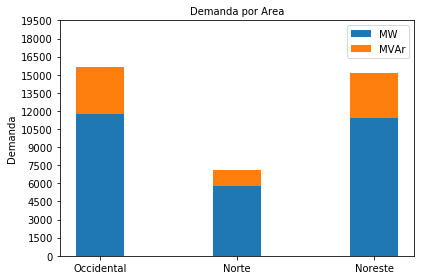

In [19]:
# Código requerido para crear la gráfica
# Ejemplo adaptado de la documentación de Matplotlib == 2.2.2 https://matplotlib.org/2.2.2/gallery/lines_bars_and_markers/bar_stacked.html

N = 3
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, df['MW'], width)
p2 = plt.bar(ind, df['MVAr'], width,
             bottom=df['MW'])

plt.ylabel('Demanda')
plt.title('Demanda por Area')
plt.xticks(ind, ('Occidental','Norte','Noreste'))
plt.yticks(np.arange(0, 20000, 1500))
plt.legend((p1[0], p2[0]), ('MW', 'MVAr'))

plt.show()

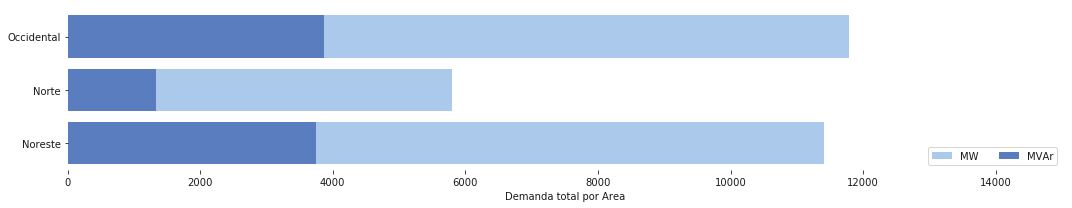

In [20]:
# Código requerido para crear la gráfica
# Ejemplo adaptado de la documentación de Seaborn https://seaborn.pydata.org/examples/part_whole_bars.html

import seaborn as sns

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 3))

# Plot MW
sns.set_color_codes("pastel")
sns.barplot(x=df["MW"], y=['Occidental','Norte','Noreste'], data=df,
            label="MW", color="b")

# Plot MVAr
sns.set_color_codes("muted")
sns.barplot(x=df["MVAr"], y=['Occidental','Norte','Noreste'], data=df,
            label="MVAr", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 15000), ylabel="",
       xlabel="Demanda total por Area")
sns.despine(left=True, bottom=True)

---

## Ejercicios de práctica

---

> Crea una función que pueda crear un subsistema a partir de una lista de números de buses y se extraiga la información de voltaje de ese subsistema y lo ponga en un data frame

> Realiza una función que extraiga el flujo de potencia de todas las líneas en cierto nivel de voltaje

> Haz algunas gráficas interesantes en las que pueadas visualizar la información que se obtiene de los dos anteriores